In [34]:
import pandas as pd
import seaborn as sns
from kervis.utils import Model
import matplotlib.pyplot as plt
from kervis.utils import Dataset
from kervis.kernels import VertexHistogram, EdgeHistogram, ShortestPath, Graphlet, WeisfeilerLehman

In [35]:
VH = VertexHistogram()
EH = EdgeHistogram()
SP = ShortestPath()
GL = Graphlet()
WL = WeisfeilerLehman(n_iter=2)

In [47]:
def get_cv_dataframe(VH, EH, SP, GL, WL, dataset_name):
    dataset = Dataset(name)
    kernels = [VH, EH, SP, GL, WL]
    kernel_names = ["VH", "EH", "SP", "GL", "WL"]
    models = ["logistic", "svm", "xgboost"]

    df = pd.DataFrame(columns = ["kernel", "model", "score"])

    for kernel, kernel_name in zip(kernels, kernel_names):
        for model in models:
            temp_df = pd.DataFrame(columns = ["kernel", "model", "score"])
            temp_df["score"] = Model(kernel, dataset, model).cv_scores
            temp_df["model"] = [model] * len(cv_scores)
            temp_df["kernel"] = [kernel_name] * len(cv_scores)
            df = pd.concat([df, temp_df])

    return df

In [48]:
MUTAG = get_cv_dataframe(VH, EH, SP, GL, WL,"MUTAG")

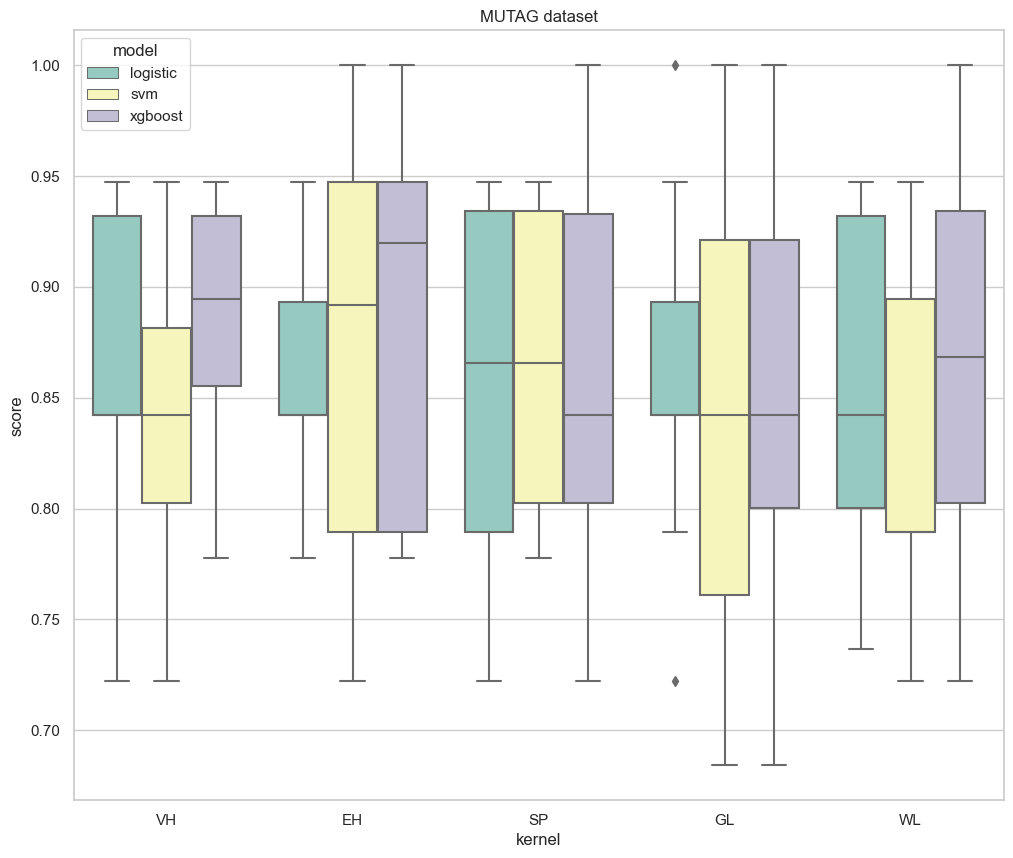

In [49]:
# use seaborn to plot boxplots for all kernels and all models for MUTAG dataset
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 10))
ax = sns.boxplot(x="kernel", y="score", hue="model", data=MUTAG, palette="Set3")
ax.set_title("MUTAG dataset")
plt.show()